In [65]:
from settings import bases, n_bases
import numpy as np
from keras.utils import to_categorical
import utils as ut
import warnings
from Bio import Phylo
from Bio.Phylo.BaseTree import Tree
from matplotlib import pyplot as plt
import TreeClass
from TreeClass import Phylogenetic_Tree

seed = 3
np.random.seed(seed)

Phylogenetic_Tree(n_taxa=3, rooted=True, seq_len=10)
    Clade(name='Root', sequence='GTCTGGCGTC')
        Clade(branch_length=0.08002823868824799, mutations=2, name='V', sequence='GGCTGGCATC')
            Clade(branch_length=0.12315078467403451, mutations=2, name='S1', sequence='CTCTGGCATC')
            Clade(branch_length=0.12315078467403451, mutations=0, name='S2', sequence='GGCTGGCATC')
        Clade(branch_length=0.2031790233622825, mutations=0, name='S3', sequence='GTCTGGCGTC')


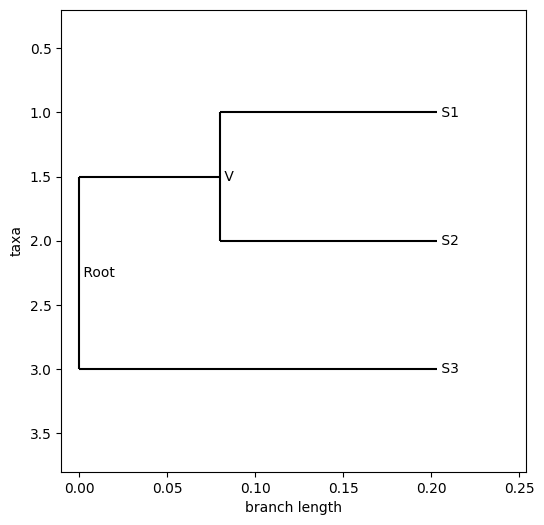

Likelihood: 1.3809505274513378e-12


In [66]:
# Generate a tree from file.

seq_len = 10

tree_basic = Phylogenetic_Tree().read_from_file("Trees/tree_basic.dnd", "newick")
tree_basic.generate_random_branch_lengths(distribution="exponential", type="ultrametric")
tree_basic.generate_sequences(seq_len)
print(tree_basic)

tree_basic.draw()
print(f"Likelihood: {tree_basic.calculate_likelihood()}")

Phylogenetic_Tree(n_taxa=10, rooted=True, seq_len=10)
    Clade(name='Root', sequence='TAATTACAAA')
        Clade(branch_length=0.06062762852276374, mutations=0, name='n0', sequence='TAATTACAAA')
            Clade(branch_length=0.31563974257784666, mutations=1, name='S9', sequence='TGATTACAAA')
            Clade(branch_length=0.31563974257784666, mutations=5, name='S7', sequence='TTCTGATGAA')
        Clade(branch_length=0.07216187972258868, mutations=1, name='n1', sequence='TGATTACAAA')
            Clade(branch_length=0.009127065533926249, mutations=0, name='n10', sequence='TGATTACAAA')
                Clade(branch_length=0.06608456040418885, mutations=0, name='n100', sequence='TGATTACAAA')
                    Clade(branch_length=0.22889386543990659, mutations=3, name='S8', sequence='TGCTTACAGT')
                    Clade(branch_length=0.22889386543990659, mutations=2, name='S4', sequence='TGATTACGGA')
                Clade(branch_length=0.29497842584409545, mutations=0, name='S3', seq

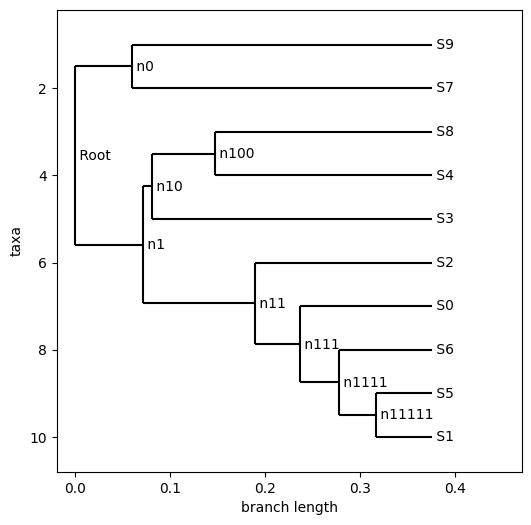

Likelihood: 3.842682708006788e-40


1

In [67]:
# Generate a random tree and write to file

seq_len = 10
n_taxa = 10

tree_random = Phylogenetic_Tree().generate_random_topology(n_taxa=n_taxa)
tree_random.generate_random_branch_lengths(distribution="exponential", type="ultrametric")
tree_random.generate_sequences(seq_len)
print(tree_random)
tree_random.draw()
print(f"Likelihood: {tree_random.calculate_likelihood()}")

# root with outgroup
# tree_random.custom_root_with_outgroup("S0")
# tree_random.make_tree_ultrametric()
# tree_random.draw()
# print(f"Likelihood: {tree_random.calculate_likelihood()}")

Phylo.write(tree_random, "Trees/tree_random.nex", "nexus")

### Explore tree space and evaluate posterior for tree

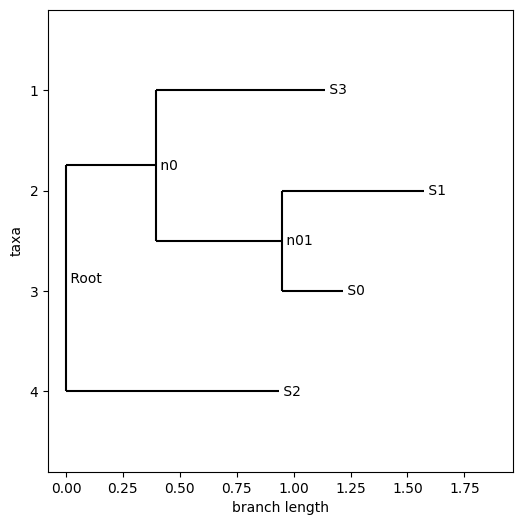

Likelihood: 3.7727299273050244e-23


In [69]:
import copy

# Generate a small random tree (4 taxa) and write to file

seq_len = 10
n_taxa = 4

tree = Phylogenetic_Tree().generate_random_topology(n_taxa=n_taxa)
tree.generate_random_branch_lengths(distribution="uniform")
tree.generate_sequences(seq_len)
tree.draw()
print(f"Likelihood: {tree.calculate_likelihood()}")

terminal_taxa = tree.get_terminals() # copy.deepcopy(tree.get_terminals()) # My data

Phylogenetic_Tree(n_taxa=4, rooted=True)
    Clade(name='Root')
        Clade(branch_length=0.04519812017672925, name='S3', sequence='CCAACTCTGT')
        Clade(branch_length=0.0674534873859931, name='n1')
            Clade(branch_length=0.033388544209290785, name='S1', sequence='CCACCGATAT')
            Clade(branch_length=0.07649450740588626, name='n11')
                Clade(branch_length=0.023528074518954775, name='S0', sequence='CCTCCGCTGG')
                Clade(branch_length=0.0681870156968334, name='S2', sequence='ACCTTAAAGC')


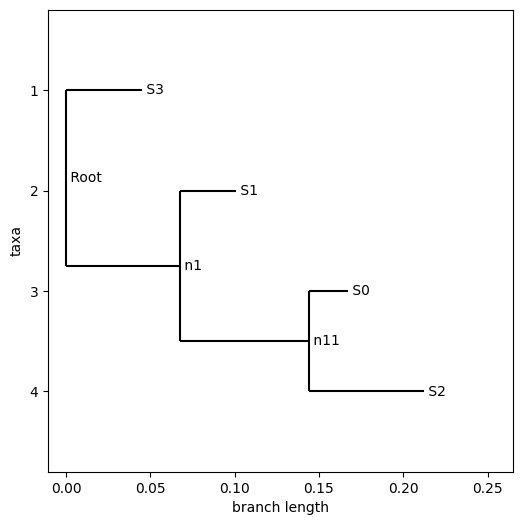

Starting tree likelihood: 3.634840435363644e-30


In [70]:
# Data: terminal taxa names and sequences
taxa_names = [clade.name for clade in terminal_taxa]
taxa_sequences = [clade.sequence for clade in terminal_taxa]

# # An MCMC step is composed of a topology proposal, then proposals for the branch lengths (sampled from an exponential distribution)

# Topology initialization
tree_init = Phylogenetic_Tree().generate_random_topology(taxa_names=taxa_names)

# Branch lengths proposal
tree_init.generate_random_branch_lengths(distribution="exponential")

# Clamp sequences to leaves
for i, clade in enumerate(tree_init.get_terminals()):
    clade.sequence = taxa_sequences[i]

print(tree_init)
tree_init.draw()

# Compute likelihood
likelihood_init = tree_init.calculate_likelihood()
print(f"Starting tree likelihood: {likelihood_init}")

True tree:


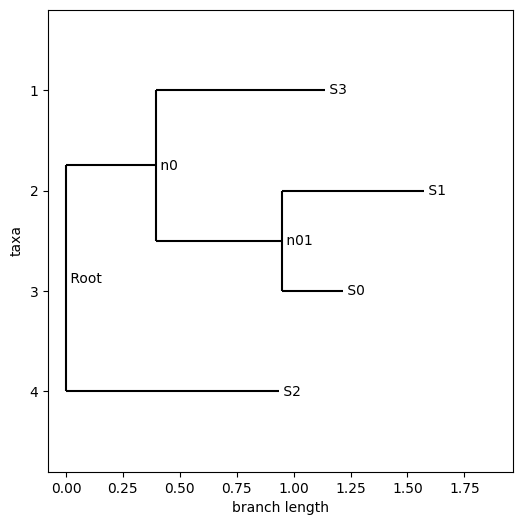

Initial proposal:


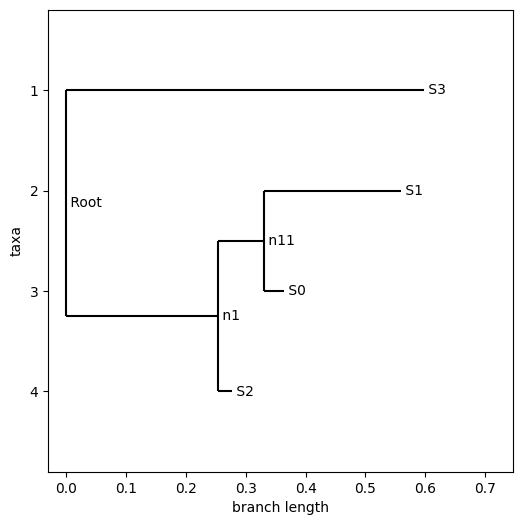

Acceptance ratio: 0.4664290873449423
Proposed tree accepted:
Acceptance ratio: 0.010316837089414246
Proposed tree rejected:
Acceptance ratio: 0.028491409460490277
Proposed tree rejected:
Acceptance ratio: 1.0
Proposed tree accepted:
Acceptance ratio: 0.00021659467599633608
Proposed tree rejected:
Acceptance ratio: 1.0
Proposed tree accepted:
Acceptance ratio: 0.03880103647016542
Proposed tree accepted:
Acceptance ratio: 0.03354316218952814
Proposed tree rejected:
Acceptance ratio: 3.8540471177049925e-05
Proposed tree rejected:
Acceptance ratio: 1.0
Proposed tree accepted:
Acceptance ratio: 0.39708588290465646
Proposed tree accepted:
Acceptance ratio: 1.0
Proposed tree accepted:
Acceptance ratio: 0.004969172590591016
Proposed tree rejected:
Acceptance ratio: 1.0
Proposed tree accepted:
Acceptance ratio: 0.00014886103912464083
Proposed tree rejected:
Acceptance ratio: 1.1851337897250972e-06
Proposed tree rejected:
Acceptance ratio: 1.0
Proposed tree accepted:
Acceptance ratio: 1.0
Propos

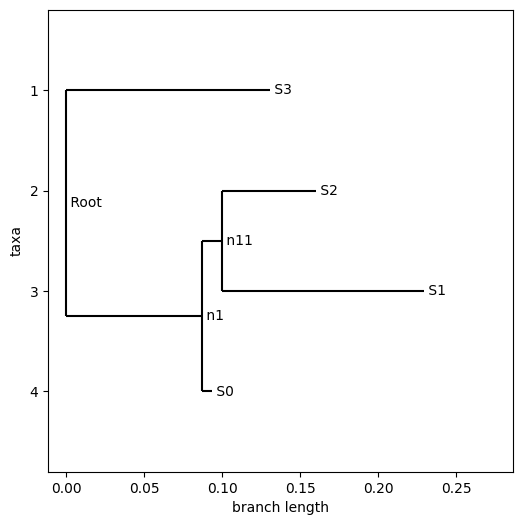

In [74]:
import random
random.seed(seed)

def NNI_permutable_nodes(tree, chosen_node): # 3 nodes that can be permuted in a rooted tree NNI step
    permutable = [] # keep this otherwise error
    permutable += chosen_node.clades # 2 children
    sibling = tree.get_sibling(chosen_node)
    if tree.parents[chosen_node] == tree.root: # if parent is root, get one nibling
        niblings = sibling.clades
        permutable.append(niblings[0])
    else: # if parent is not root, get sibling
        permutable.append(sibling)
    assert len(permutable) == 3 
    return permutable

def NNI_generate_topology(tree, chosen_node, permutable):
    NNI_tree = copy.deepcopy(tree)
    for NNI_clade in NNI_tree.get_nonterminals():
        if NNI_clade.name == chosen_node.name:
            NNI_clade.clades = permutable[:2]
            NNI_parent = NNI_tree.parents[NNI_clade]
            if NNI_parent != NNI_tree.root: # if parent is not root
                NNI_parent.clades = [NNI_clade, permutable[2]]
            else: # if parent is root
                NNI_sibling = NNI_tree.get_sibling(NNI_clade)
                NNI_niblings = NNI_sibling.clades
                NNI_sibling.clades = [permutable[2], NNI_niblings[1]] # in permutable, there is nibling[0], here we gave to get the other nibling, the one that stays put (nibling[1])
    NNI_tree.parents = NNI_tree.dict_parents()
    return NNI_tree

# # NNI step:
# choose a node (from the eligible nodes)
# create new topology by performing NNI
# propose branch lengths
# compute likelihood

# Integrate in a single function NNI_permutable_nodes and NNI_generate_tree 

def NNI_step(tree_init):
    NNI_nodes = tree_init.NNI_eligible_nodes()
    # print(f"Internal edges: {[node.name for node in NNI_nodes]}")

    chosen_node = random.choice(NNI_nodes)
    # print(f"Chosen node: {chosen_node}")

    permutable = NNI_permutable_nodes(tree_init, chosen_node)
    # print(f"Nodes to be permuted: {[node.name for node in permutable]}")
    
    tree_init.likelihood = tree_init.calculate_likelihood()
    # print(f"Original likelihood: {tree_init.likelihood}")

    # print(f"Initial tree:")
    # tree_init.draw()

    for i in range(2):
        new_nodes = permutable[-(i+1):] + permutable[:-(i+1)]
        # print(f"New nodes: {[node.name for node in new_nodes]}")
        NNI_tree = NNI_generate_topology(tree_init, chosen_node, new_nodes)
        NNI_tree.generate_random_branch_lengths(distribution="exponential")
        
        NNI_tree.parents = NNI_tree.dict_parents() # Update parents dictionary to calculate likelihood
        NNI_tree.likelihood = NNI_tree.calculate_likelihood()
        # print(f"Proposed likelihood: {NNI_tree.likelihood}")

        rho = np.min([1, NNI_tree.likelihood / tree_init.likelihood])
        print(f"Acceptance ratio: {rho}")

        if np.random.random() < rho:
            print("Proposed tree accepted:")
            # updated_tree = copy.deepcopy(NNI_tree)
            # updated_tree.draw(figsize=(4,1))
            # NNI_tree.draw()
            return NNI_tree
        else:
            print("Proposed tree rejected:")
            # NNI_tree.draw()
        
    return tree_init

print("True tree:")
tree.draw()

print("Initial proposal:")
tree_init.draw()

nsteps = 100
for i in range(nsteps):
    tree_init = NNI_step(tree_init)

print("Final tree:")
tree_init.draw()

In [ ]:
# print(tree)
# tree.draw(figsize=(4,1))
# tree.likelihood = tree.calculate_likelihood()
# print(f"Original likelihood: {tree.likelihood}")

# for i in range(2):
#     new_nodes = copy.deepcopy(permutable[-(i+1):] + permutable[:-(i+1)]) # copy is needed otherwise I am referring to nodes in the original tree
#     new_tree = NNI_generate_tree(tree, chosen_node, new_nodes)
#     r = np.random.uniform(0.8, 1.2)
#     print(f"Rescale by {r}")
#     for clade in new_tree.find_clades():
#         if clade.branch_length:
#             clade.branch_length *= r
    
#     # print(new_tree)
    
#     new_tree.likelihood = new_tree.calculate_likelihood()
#     print(f"New likelihood: {new_tree.likelihood}")
#     rho = np.min([1, new_tree.likelihood / tree.likelihood])
#     print(f"Acceptance ratio: {rho}")
#     if np.random.random() < rho:
#         print("New tree accepted")
#         updated_tree = copy.deepcopy(new_tree)
#         updated_tree.draw(figsize=(4,1))
#         break
#     else:
#         print("New tree rejected")
#         updated_tree = copy.deepcopy(tree)
#     new_tree.draw(figsize=(4,1))

#     # I use a Metropolis-Hastings strategy, so I construct the first tree, then its acceptance ratio, and if passed, I accept it, otherwise I generate the second tree and repeat. If both are rejected, I keep the original tree. 

In [ ]:
file_path = "Trees\\"
file_name = "primates_and_galeopterus_cytb.nex"
Phylo.convert(file_path+file_name, "nexus", file_path+"primates_and_galeopterus_cytb.dnd", "newick")
# nexus_tree = Phylo.read(file_path + file_name, "nexus")
# print(nexus_tree)

In [ ]:
# permutable_1 = permutable[-1:] + permutable[:-1]
# permutable_2 = permutable[-2:] + permutable[:-2]
# permutables = [permutable_1, permutable_2]

# import copy

# new_tree_1 = copy.deepcopy(tree)
# new_tree_2 = copy.deepcopy(tree)
# tree_list = [new_tree_1, new_tree_2]

# print(chosen_node)

# tree.draw(figsize=(4,1))

# for i, new_tree in enumerate(tree_list):
#     for clade in new_tree.get_nonterminals():
#         if clade.name == chosen_node.name:
#             clade.clades = permutables[i][:2]
#             if new_tree.parents.get(clade) != new_tree.root: 
#                 parent_node = new_tree.parents.get(clade)
#                 parent_node.clades = [clade, permutables[i][2]]
#             elif new_tree.parents.get(clade) == new_tree.root:
#                 sibling = new_tree.siblings.get(clade)
#                 niblings = new_tree.children.get(sibling)
#                 sibling.clades = [permutables[i][2], niblings[1]]
#     # Update family relationships
#     new_tree.children = new_tree.dict_children()
#     new_tree.parents = new_tree.dict_parents()
#     new_tree.siblings = new_tree.dict_siblings()
#     new_tree.draw(figsize=(4,1))

#     # I use a Metropolis-Hastings strategy, so I construct the first tree, then its acceptance ratio, and if passed, I accept it, otherwise I generate the second tree and repeat. If both are rejected, I keep the original tree. 

In [ ]:
MAP_tree = Phylo.read("analyses\\primates_cytb_JC_MAP.tree", "nexus")

for clade in MAP_tree.find_clades():
    if type(clade.branch_length) == str:
        bl = float(clade.branch_length[:8])
        clade.branch_length = bl

print(MAP_tree)
# terminal_branch_lengths = np.array([clade.branch_length for clade in MAP_tree.get_terminals()])
# internal_branch_lengths = np.array([clade.branch_length for clade in MAP_tree.get_nonterminals()])


# bins = np.linspace(0, 0.3, 30)
# plt.hist(terminal_branch_lengths, bins, alpha=0.5, label='terminal')
# plt.hist(internal_branch_lengths, bins, alpha=0.5, label='internal')
# plt.legend(loc='upper right')
# plt.show()


Phylo.draw(MAP_tree)

MAP_tree.rooted = True
# for clade in MAP_tree.find_clades():
#     print(clade.clades)

outgroup = ["Galeopterus_variegatus"]#, 0.050508999999999964]

# Root the tree using the specified outgroup
MAP_tree.root_with_outgroup(outgroup)
# MAP_tree.root_at_midpoint()
Phylo.draw(MAP_tree)

In [ ]:
# # Changes to insert in commit:
